# K-Nearest Neighbors (K-NN)

## Distance Measure in KNN

Euclidean
Minkowski
Manhattan
Hamming
Cosine
Jaccard

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape

(300, 2)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Making the Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

## Hyperparameter using GridSearchCV

In [7]:
parms_data = {
 "n_neighbors": [1,2,3,4,5,6,7,8,9,10],
    "metric": ['euclidean','minkowski','manhattan'],
    "p": [1,2,3]
}

In [8]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(classifier, param_grid=parms_data, cv= 10)

In [9]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3]})

In [10]:
grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 7, 'p': 3}

In [11]:
grid.best_score_

0.9133333333333334

## 2nd Method

In [12]:
accuracy = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

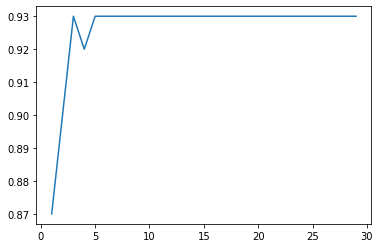

In [13]:
plt.plot(range(1,30),accuracy)

In [14]:
def predict_output():
    age= int(input("Enter your age: "))
    salary = int(input("Enter your salary: "))
    
    X_new = np.array([[age],[salary]]).reshape(1,2)
    X_new = sc.transform(X_new)
    
    if knn.predict(X_new)[0]==0:
        return "Will not Purchase"
    else:
        return "Will Purchase"

In [15]:
predict_output()

Enter your age: 23
Enter your salary: 345532


'Will Purchase'

In [16]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))
    

Text(0, 0.5, 'Error Rate')

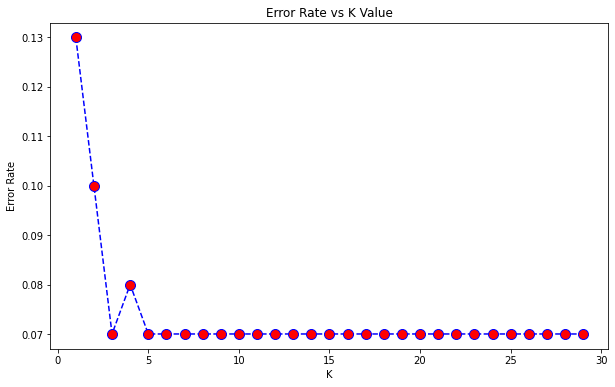

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Making Decision Boundary
##### 1. Classifiy On Training Data
##### 2. Create Uniform grid using Meshgrid
##### 3. Classifiy each point on the grid
##### 4. Plot the array as an image
##### 5. Finally print output

## Creating a Meshgrid

In [18]:
a = np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b = np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)

XX,YY = np.meshgrid(a,b)

## Classifiying each point on the Meshgrid

In [19]:
input_array = np.array([XX.ravel(),YY.ravel()]).T
labels = knn.predict(input_array)

## Plotting array using image

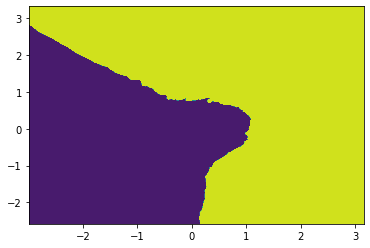

In [20]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

## Plotting all training data on the plot

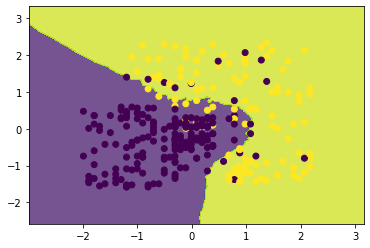

In [21]:
plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

## Impacts Of K (Overfiting & Underfiting)
#### Overfiting - K is low
#### Underfiting - K is high

In [22]:
### Effect of K in training & testing error rate
error_train=[]
error_test= []

for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    x = confusion_matrix(y_train, knn.predict(X_train))
    y = confusion_matrix(y_test, knn.predict(X_test))
    error_train.append((X[0][1]+X[1][0])/X.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())

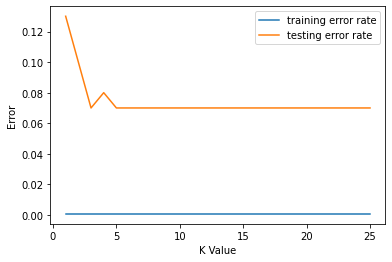

In [23]:
plt.plot(range(1,26),error_train,label="training error rate")
plt.plot(range(1,26),error_test, label="testing error rate")
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()